<a href="https://colab.research.google.com/github/raulfruiz/Pandas_and_seaborn/blob/main/PandasAndSeaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [2]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando el set de datos

In [4]:
#Define el dataframe (df) y llama un método de Pandas para leer el archivo
df = pd.read_csv('/content/StudentsPerformance.csv')

In [5]:
df.head(8) #muestra las primeras n entradas. Si se deja vacío muestra los primeros 5 por defecto

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39


In [ ]:
df.shape #Indica la dimensión de la matriz

(1000, 8)

In [ ]:
df.columns #Muestra el nombre de cada columna

In [6]:
df.dtypes #Muestra el tipo de dato que almacena cada columna

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

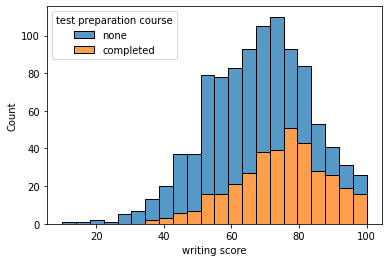

In [9]:
sns.histplot(data=df, x='writing score',hue='test preparation course', multiple='stack')

### Visualizando los datos

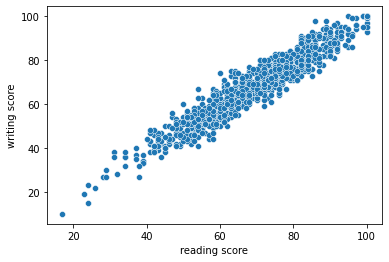

In [10]:
sns.scatterplot(data=df, x= 'reading score',y='writing score')
#Esta función grafica punto por punto cada dato.
#En este caso se usó para ver si cabe la posibilidad de que haya una correlación entre ambas variables

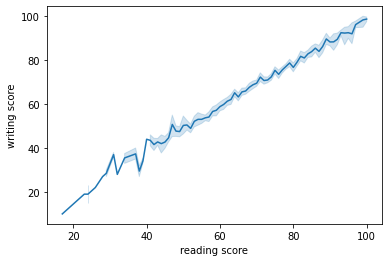

In [11]:
#Ahora se graficarán los mismos datos pero representados en una línea
sns.lineplot(data=df, x='reading score',y='writing score')
#Y sí se alcanza a parecer a una línea recta

### Creando una tabla de frecuencias

In [12]:
#Método para contar cuántas veces se repite un mismo valor, en este caso, el mismo puntaje.
freq= df['writing score'].value_counts()

#Para mejorar la visualización:
df_freq= freq.to_frame()

#Permitir agregar labels

df_freq.reset_index(inplace=True)

#Asignar nombres a los labels

df_freq = df_freq.rename(columns={'index': 'Writing score', 'writing score':'# students with this score'})
df_freq

,Writing score,# students with this score
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [14]:
df.mean() #Promedio de cada evaluación

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [13]:
df.median() #Mediana de cada evaluación

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando el modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Hipótesis: si un estudiante obtiene un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [15]:
#Scikitlearn
#La hipótesis es que cuanto mayor fue la nota de escritura de un/a estudiante, mayor fue su nota de lectura. Así:
X = df['reading score'] 

#Ese código me muestra todas las calificaciones obtenidas, pero, con índices. Como no se quiere eso se usa la función .values para obtener el array
X=X.values

#Ahora se hace lo mismo con lo que se definirá como el eje Y.

Y = df['writing score'].values 

#Importación de Scikitlearn
from sklearn.model_selection import train_test_split #Importación necesaria

'''Tomar datos de entrenamiento y datos de modelado
Para ver que los datos no estén sesgados. Se hace siempre que se entrena un modelo. Da una comprensión más amplia del caso.'''

#train_test_split (y muchos otros algoritmos de ML) necesita que X y Y estén en un formato especial. No como array, sino como tensor.
#Para ello se usa la función:

X=X.reshape(-1,1)

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2) #Toma el 20% de los datos para entrenamiento

#regresión lineal
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

reg.fit(X_train,Y_train)

print("La pendiente es ", reg.coef_) #.coef_ devuelve el slope o pendiente de la regresión lineal calculada previamente
print("El intercepto con el eje X es ", reg.intercept_)# .intercept_ devuelve el valor del eje Y cuando X vale 0 (intercepto, o "b" en la ecuación, y=mx + b, de la recta)
print ("La correlación es ", reg.score(X_train, Y_train))#Este coeficiente indica qué tan relacionadas están las variables ingresadas como parámetros. Va de 0 a 1, donde
#0 es que no existe correlación y 1 es que están totalmente correlacionadas. 


La pendiente es  [0.9897961]
El intercepto con el eje X es  -0.4322959133223492
La correlación es  0.9104162011534401


## Visualización del modelo entrenado

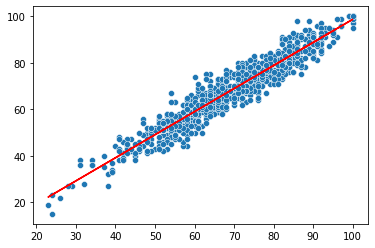

In [ ]:
#Visualización.
#Se usa la función flatten() en el arreglo X_train para volverlo una lista de nuevo, esto porque scatterplot grafica vectores, no tensores

x_flat=X_train.flatten()

#Obtener la recta producto de la regresión lineal para ver qué tanto se ajusta a los datos de entrenamiento
y_hat = reg.predict(X_train)  #variable creada para predecir los valores que tendría y, pero usando los x de entrenamiento.

#Trazar la recta en la misma grafica usando matplotlib
fig, ax = plt.subplots()

sns.scatterplot(x=x_flat, y=Y_train) #graficar los puntos de los datos de entrenamiento
plt.plot(X_train, y_hat, color= 'r')#graficar la recta calculada a partir de hacer regresión lineal (la llamada "predicción")

#Y así queda graficado lo que se entrenó, que fue usando el 20%a de los datos.

## Evaluación del modelo

In [16]:
#Evaluar qué tanto se acerca la recta obtenida usando LinearRegression calculando el MSE (mean square error)
#Este indica qué tan alejados están los datos reales (puntos azules) de los datos de la predicción (linea roja)
#Usar el modulo metrics de la libreria sklearn e importar mean_squared_error. 

from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test) #variable creada para predecir los valores que tendría y, pero usando los x de prueba.

#Calculando el MSE:
print(mean_squared_error(Y_test, y_pred)) #Comparar el MSE entre los datos destinados al testeo (reales) y los datos predichos 

#Un menor MSE significa una mejor aproximación del modelo lineal a lo que es la realidad

20.583075194918482


In [18]:
#Ver dato por dato qué tan alejado está el modelo creado de los datos reales 
#se crea el siguiente dataframe
values = pd.DataFrame({'Real value': Y_test.flatten(), 'Predicted value':y_pred.flatten()})
values

,Real value,Predicted value
0,70,71.822820
1,69,59.945266
2,83,88.649353
3,80,80.730985
4,55,56.975878
...,...,...
195,54,54.006490
196,86,87.659557
197,46,51.037101
198,80,79.741188
